# Прогнозирование наличия сахарного диабета.

<img src='diab.jpg' style='width:600px;height:350px'/>

По воле случая в жизни компании "Тралала" встречались разные люди, и не исключением были прекрасные люди с сахарным диабетом. В один момент компания задумалась, а как же можно предсказать возникновение диабета и поклялась жизнью приблизиться хоть на чуточку к ответу на этот загадочный вопрос. 



## Импорт необходимым библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

import warnings

warnings.filterwarnings("ignore")

### Общая информация по данным

In [2]:
df = pd.read_csv('diabetes_predict.csv')

In [3]:
def df_info(data):
    print("Общая информация по датасету:")
    display(data.head())
    print('----------------------------')
    display(data.info())
    print('----------------------------')
    display(data.describe())

In [4]:
df_info(df)

Общая информация по датасету:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

----------------------------


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Колонки в нашем датасете содержат следующую информацию:

`gender` - пол пациента

`age` - сколько лет пациенту

`hypertension` - имеется ли гипертония

`heart_disease` - имеется ли болезни сердца

`smoking_history` - история курения

`bmi` - индекс массы тела

`HbA1c_level` - уровень гемоглобина в крови

`blood_glucose_level` - уровень глюкозы в крови

`diabetes` - имеется ли диабет у человека или нет


Проверим количество NaN значений в датасете

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Вывод показывает, что NaN значения у нас в датафрейме отсутствуют. Проверим теперь наличие дубликатов.

In [6]:
print(f'Дубликатов найдено: {df.duplicated().sum()}')

Дубликатов найдено: 3854


3854 дубликата найдено. Дубликаты сами по себе могут не вызывать ошибок, но отнимать времени для получения результата возможность у них есть. Поэтому избавимся от них.

In [7]:
df = df.drop_duplicates()

Проверим теперь их количество:

In [8]:
print(f'Дубликатов найдено: {df.duplicated().sum()}')

Дубликатов найдено: 0


Дубликаты были удалены, можем приступать к исследовательскому анализу данных.

## Анализ данных


Посмотрим какое количество людей проходивших исследование к какому гендеру относятся. И как распределен диабет между полами.

<AxesSubplot:xlabel='gender', ylabel='count'>

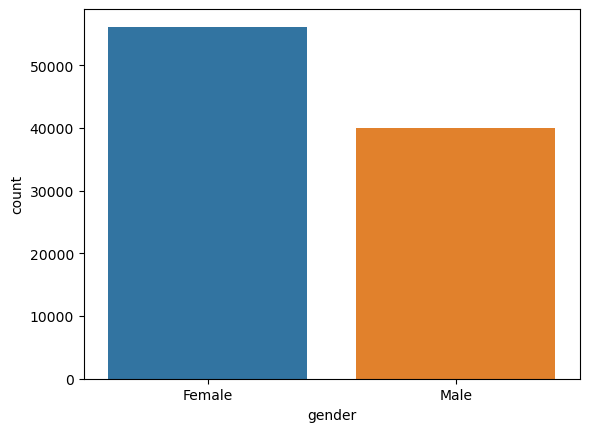

In [23]:
sns.countplot(data=df, x='gender')

Посмотрим на количество испытуемых у которых диагностиран диабет и на количество тех у кого нет.

<AxesSubplot:xlabel='gender', ylabel='count'>

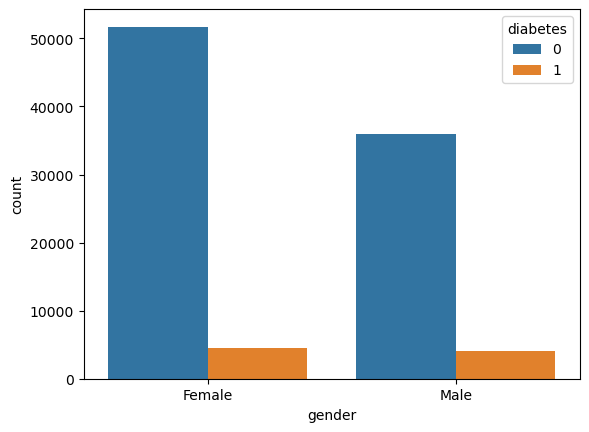

In [10]:
sns.countplot(data=df, x='gender', hue='diabetes')

Видим ярко выраженный дисбаланс классов. Посмотрим на цифры:

In [11]:
df['diabetes'].value_counts()
axes[0].

0    87646
1     8482
Name: diabetes, dtype: int64

Да, распределения целевой переменной имеет дисбаланс. Посмотрим, что нам удастся сделать в процессе построения модели машинного обучения.

---
Взглянем на историю курения для каждого гендера

<AxesSubplot:xlabel='gender', ylabel='count'>

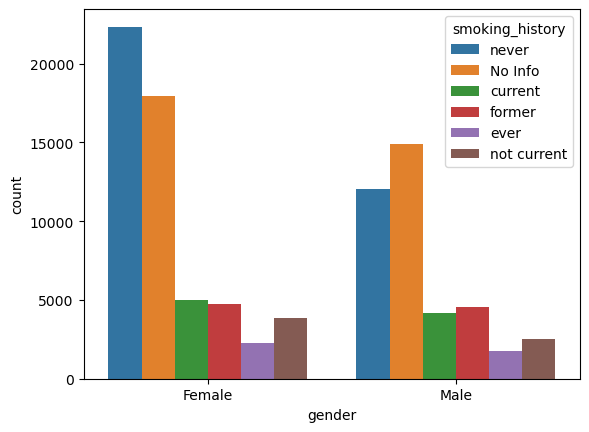

In [13]:
sns.countplot(data=df, x='gender', hue='smoking_history')

У обоих полов премущественно выделяются два распределения, `never` - никогда не курил и `not info` - нету информации. 

---
Посмотрим на корреляцию между переменными.

<AxesSubplot:>

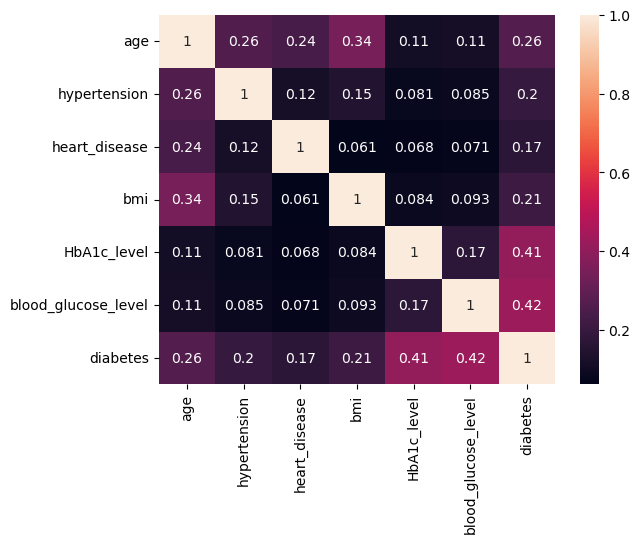

In [14]:
sns.heatmap(df.corr(), annot=True)

На графике вывода можно наблюдать, что большинство переменных имеют слабо выраженную корреляцию. Из всех выделяются только `HbA1c_level` - уровень Гликированного гемоглобина и `blood_glucose_level` - уровень глюкозы в крови.

### Вывод: 
   - Был проведен исследовательский анализ данных.
   - В процессе был обнаружен дисбаланс классов.
   - Так же была произведена очистка данных от дубликатов.
   - Была рассмотрена корреляция между признаками.

## Постановка задачи

Перед нами стоит задача классификации - необходимо определить окажется ли диабет у человека ввиду исторических данных или нет. Для достижения результатов данной задачи предлагаю использовать `логистическую регрессию`, `случайный лес` и `AdaBoost`. 

Оценивать результаты моделей будем по `F1-мере`.

Для оценки итоговой модели используем `ROC-AUC`.

По видимому дисбалансу классов метрика - `accuracy` нам не подойдет.

### Подготовка признаков

In [15]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Произведем удаление ненужных признаков и сформируем новый датасет, чтобы не перезаписывать переменные.

Удалим историю курения, так как там много данных, которые ничего полезного нам не предоставят, а только скорее всего запутают наши модели. 

In [16]:
data = df.drop('smoking_history', axis=1)
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


Переведем категориальные переменные признака в количественные. 

In [17]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)

In [18]:
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99981
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  uint8  
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   bmi                  96128 non-null  float64
 5   HbA1c_level          96128 non-null  float64
 6   blood_glucose_level  96128 non-null  int64  
 7   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), uint8(1)
memory usage: 6.0 MB


Произвели удаление лишних столбцов и кодирование категориальных переменных.

### Разделение выборки

Разделим данные на обучающую выборку, валидационную для подбора гиперпараметров и тестовую, на которой мы проверим нашу модель. Тестовую выборку до конца трогать не будем, на ней отработаем лучшую модель.

Для начала получим валидационную выборку 20% и оставшиеся 80% разделим еще раз для получения тестовой выборки. Обучение будем проводить на 60% данных.

In [20]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [21]:
X_df, X_valid, y_df, y_valid = ( 
                                train_test_split(
                                X, y, test_size=0.20, random_state=42)
)

In [22]:
X_train, X_test, y_train, y_test = ( 
                                train_test_split(
                                X_df, y_df, test_size=0.25, random_state=42)
)

In [23]:
print('Количество образцов обучающей выборки:', len(X_train))
print('Количество образцов валидационной выборки:', len(X_valid))
print('Количество образцов тестовой выборки:', len(X_test))
print('Сумма выборок:', len(X_train) + len(X_test) + len(X_valid))
print()
print('Количество образцов подготовленной выборки (контрольная сумма):', len(data))

Количество образцов обучающей выборки: 57676
Количество образцов валидационной выборки: 19226
Количество образцов тестовой выборки: 19226
Сумма выборок: 96128

Количество образцов подготовленной выборки (контрольная сумма): 96128


Выборку разделили, можем переходить к пробному обучению моделей. Посмотрим на результаты, оценивать модели будем по F1 мере - она является хорошим кандидатом на формальную метрику оценки качества классификатора. Она сводит к одному числу две других основополагающих метрики: точность и полноту (precision и recall)

## Масштабирование

Масштабировать признаки на всем датасете может привести к утечке данных. Обучать scaler нужно только на трейне.

In [24]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
scaler.fit(X_train[col])
X_train[col] = scaler.transform(X_train[col])
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
63423,0,0.454520,0,0,0.145200,-1.897801,-1.299620
83565,0,0.098726,0,0,-0.832125,0.989252,0.480973
49689,1,-1.724722,0,0,-0.903096,0.523598,0.505365
90229,0,-0.568389,0,0,-0.461008,-0.966494,-0.933745
25416,1,-0.790761,0,0,-1.247599,-0.687102,0.041923


Применим на валидационнуб выборку scaler, обученный на трейне.

In [25]:
X_valid[col] = scaler.transform(X_valid[col])
X_valid.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
2547,0,-1.635773,0,0,-1.799100,-0.966494,-1.177661
47503,0,-0.701812,0,0,-1.283084,-1.432148,-1.299620
15484,0,-1.635773,0,0,-1.873028,-0.500840,0.480973
92915,1,1.566379,0,1,0.374376,-1.432148,-1.177661
67261,1,-0.835235,0,0,-0.925274,0.896121,-0.201994


Применим на тестовую выборку scaler, обученный на трейне.

In [26]:
X_test[col] = scaler.transform(X_test[col])
X_test.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
41130,1,0.232149,0,0,0.331498,-1.897801,-1.177661
5433,0,-0.434966,0,0,0.057965,-1.897801,0.529757
93716,0,-1.546825,0,0,-0.999202,-0.966494,-1.177661
68137,1,1.388481,1,0,0.001780,0.430467,-0.201994
99020,0,-0.123646,0,0,-1.068694,0.430467,0.041923


## Пробное обучение моделей без учета дисбаланса классов


### Логистическая регрессия 

Начнем за базовой логистической регрессии. Вес классов не указываем.

In [27]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7173689619732785


Наблюдаем уверенный показатель. Попробуем указать `class_weight='balanced'`

In [28]:
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.5693402577418735


Показатель ухудшился, сейчас не будем менять гиперпараметры, вернем к этому после того, как посмотрим на все алгоритмы.

### Случайные леса

In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7755517826825129


Показатель так же имеет хороший показатель, укажем так же `class_weight='balanced'`

In [30]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7742372881355932


Ухудшили показатель на одну тысячную. Перейдем к следующему алгоритму, гиперпараметры подберем позже

### AdaBoost

In [31]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7956839540549948


Среди всех моделей у AdaBoost лучшие показатели

Мы попробовали обучить модели при  дисбалансе классов. Теперь попробуем избавится от этой проблемы, подобрать гиперпараметры моделей.

##  Решение дисбаланса классов и улучшение моделей

В наших данных имеется дисбаланс классов. Взглянем еще раз.

In [32]:
y.value_counts().to_frame()

,diabetes
0,87646
1,8482


Попробуем решить эту проблему, двумя способами. Выберем лучший и на нем будем улучшать нашу модель. 

---

### Увеличение выборки upsampling
Для этого применим функцию, выполняющую следующие преобразования:

- разделим обучающую выборку на отрицательные и положительные объекты
- скопируем несколько раз положительные объекты
- с учётом полученных данных создадим новую обучающую выборку
- перемешаем данные

In [33]:
def upsample(X, y, repeat):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    X_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    y_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(
    X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, 3)

### Логистическая регрессия

In [34]:
model = LogisticRegression()
model.fit(X_upsampled,y_upsampled)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.6870483602001111


Наблюдаем пониженные результаты в сравнение с предыдущими моделями логистической регрессии.

### Случайные леса

In [35]:
model = RandomForestClassifier()
model.fit(X_upsampled, y_upsampled)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.756430612892982


 Случайне леса так же показали результат хуже чем предыдущие модели

### AdaBoost

In [36]:
model = AdaBoostClassifier()
model.fit(X_upsampled, y_upsampled)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7691844718627747


Как и остальные модели, AdaBoost показал результаты незначительно хуже чем в прошлой модели. Но лучше остальных по изменненым данным.

---
### Уменьшение выборки downsampling
Для этого применим функцию, выполняющую следующие преобразования:

- разделим обучающую выборку на отрицательные и положительные объекты
- случайным образом отбросим часть из отрицательных объектов
- с учётом полученных данных создадим новую обучающую выборку
- перемешаем данные

In [37]:
def downsample(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    
    X_downsampled = pd.concat(
        [X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

X_downsampled, y_downsampled = downsample(X_train, y_train, 0.39)

### Логистическая регрессия

In [38]:
model = LogisticRegression()
model.fit(X_downsampled,y_downsampled)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7013138686131387


### Случайные леса

In [39]:
model = RandomForestClassifier()
model.fit(X_downsampled, y_downsampled)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7463746670612608


### AdaBoost

In [40]:
model = AdaBoostClassifier()
model.fit(X_downsampled, y_downsampled)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7858282796042131


В итоге с downsampling мы превзошли результаты двух из трех моделей в данных с upsampling. Так что остановимся на downsampling уменьшении выборки. На ней обучим наши модели и подберем гиперпараметры.

## Обучение моделей и настройка гиперпараметров
Обучать модели будем на уменьшенной выборке, проверять параметры будем на валидационной выборке и оценивать по F1-мере.

Параметры будем подбирать черезе GridSearchCV.

----
Для начала настроим функцию для тестирования

In [55]:
def test_roc(model, X_valid, y_valid):
    probabilities_valid = model.predict_proba(X_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) 

    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')

    plt.show()

    auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

    print("AUC:", auc_roc)

### Логистическая регрессия

In [44]:
param_grid = {
                'intercept_scaling': [0.5, 1.0, 1.5],
                'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                'class_weight': [None, 'balanced'],
                'C': [0.5, 1, 1.5],
                'solver': ['lbfgs', 'liblinear']
            }


model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

grid_search.fit(X_downsampled, y_downsampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None, 'balanced'],
                         'intercept_scaling': [0.5, 1.0, 1.5],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [46]:
grid_search.best_params_

{'C': 1,
 'class_weight': None,
 'intercept_scaling': 0.5,
 'l1_ratio': 0,
 'solver': 'lbfgs'}

Применим наши параметры и посмотрим результат:

In [47]:
model_logreg = LogisticRegression(
                            C=1, 
                            class_weight=None, 
                            intercept_scaling=0.5, 
                            l1_ratio=0, 
                            solver='lbfgs'
                           )
model_logreg.fit(X_downsampled, y_downsampled)
predicted_valid = model_logreg.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7013138686131387


Посмотрим как модель ведет себя при тестировании.

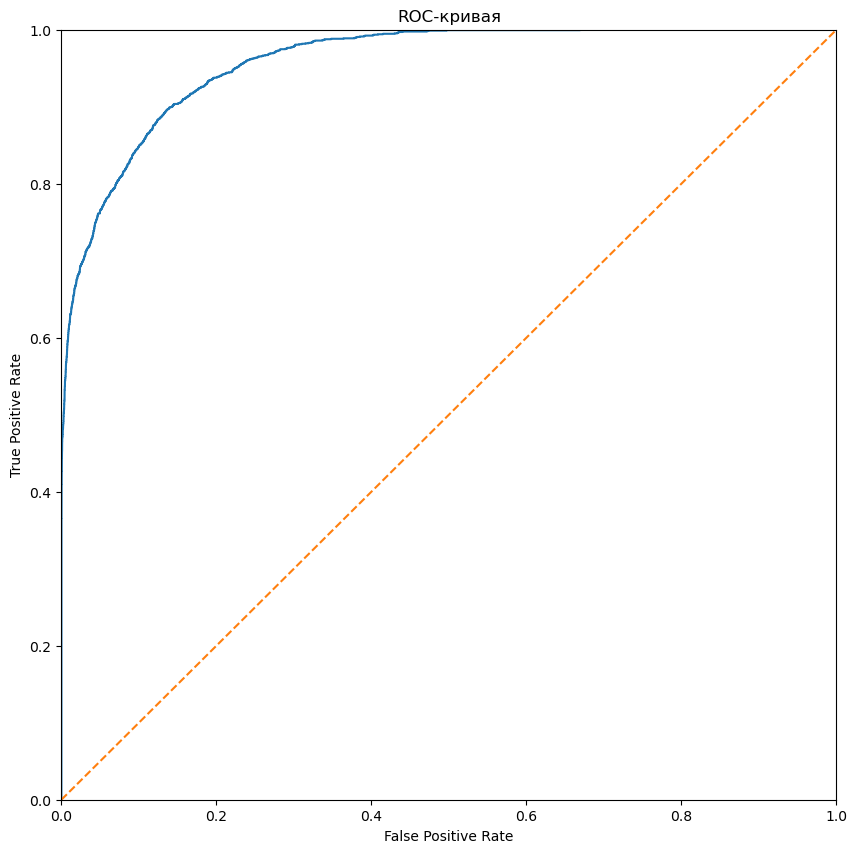

AUC: 0.9582672775349903


In [57]:
test_roc(model_logreg, X_valid, y_valid)

AUC показывает больше 0.5, наша модель лучше случайной и показывает отличной результат учитывая наше медицинское предсказывание.

### Случайные леса

In [58]:
param_grid = {
                'n_estimators': [30, 50, 75,100],
                'max_features': [2,3,4],
                'bootstrap':[True,False],
                'oob_score':[True,False],
                'class_weight': [None, 'balanced']
              } 


model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')

grid_search.fit(X_downsampled, y_downsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [30, 50, 75, 100],
                         'oob_score': [True, False]},
             scoring='f1')

In [59]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_features': 2,
 'n_estimators': 50,
 'oob_score': True}

Применим параметры

In [60]:
model_rand_forst = RandomForestClassifier(
                            n_estimators=50,
                            bootstrap=True, 
                            class_weight=None, 
                            max_features=2, 
                            oob_score=True
                           )
model_rand_forst.fit(X_downsampled, y_downsampled)
predicted_valid = model_rand_forst.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.737841043890866


Взглянем на модель при тестировании.

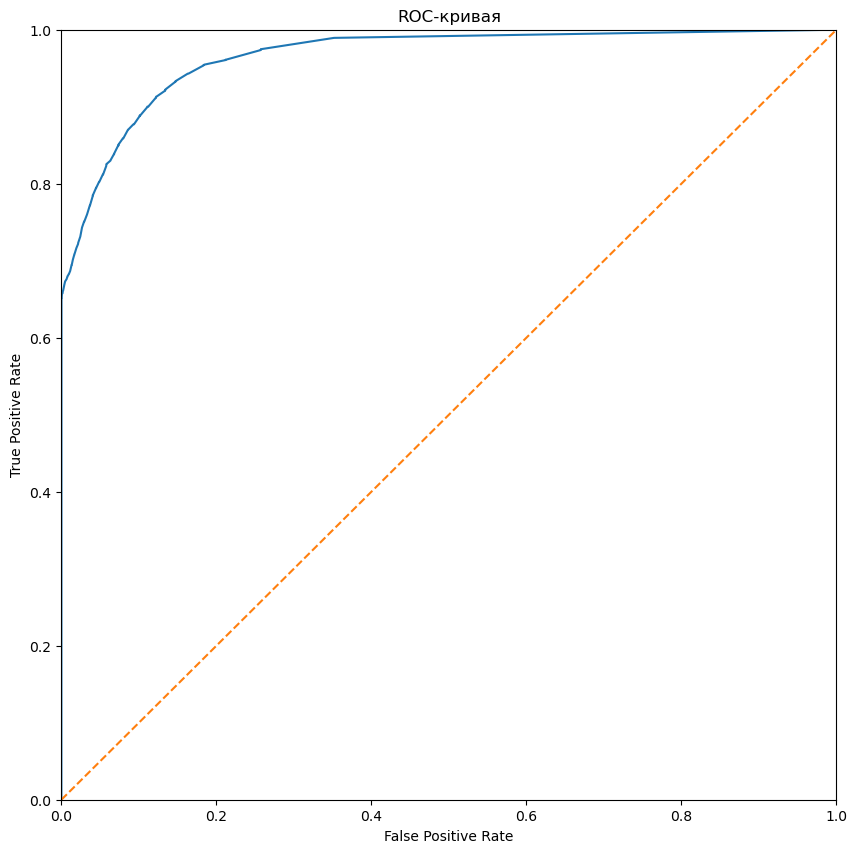

AUC: 0.9651577279790943


In [61]:
test_roc(model_rand_forst, X_valid, y_valid)

AUC - 0.96. Модель на основе рандомных лесов так же лучше случайной модели и показывает хороший результат.

### AdaBoost

In [73]:
param_grid = {
                'n_estimators': [30, 50, 65, 75, 100],
                'algorithm': ['SAMME', 'SAMME.R'],
                'learning_rate': [0.6, 0.8, 1, 1.2]
              } 

model = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.6, 0.8, 1, 1.2],
                         'n_estimators': [30, 50, 65, 75, 100]},
             scoring='f1')

In [74]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50}

Применим полученные параметры к модели

In [82]:
model_ada_boost = AdaBoostClassifier(
                        n_estimators=50,
                        algorithm='SAMME.R', 
                        learning_rate=1
                           )
model_ada_boost.fit(X_downsampled, y_downsampled)
predicted_valid = model_ada_boost.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.7858282796042131


Посмотрим как модель ведет себя при тестировании.

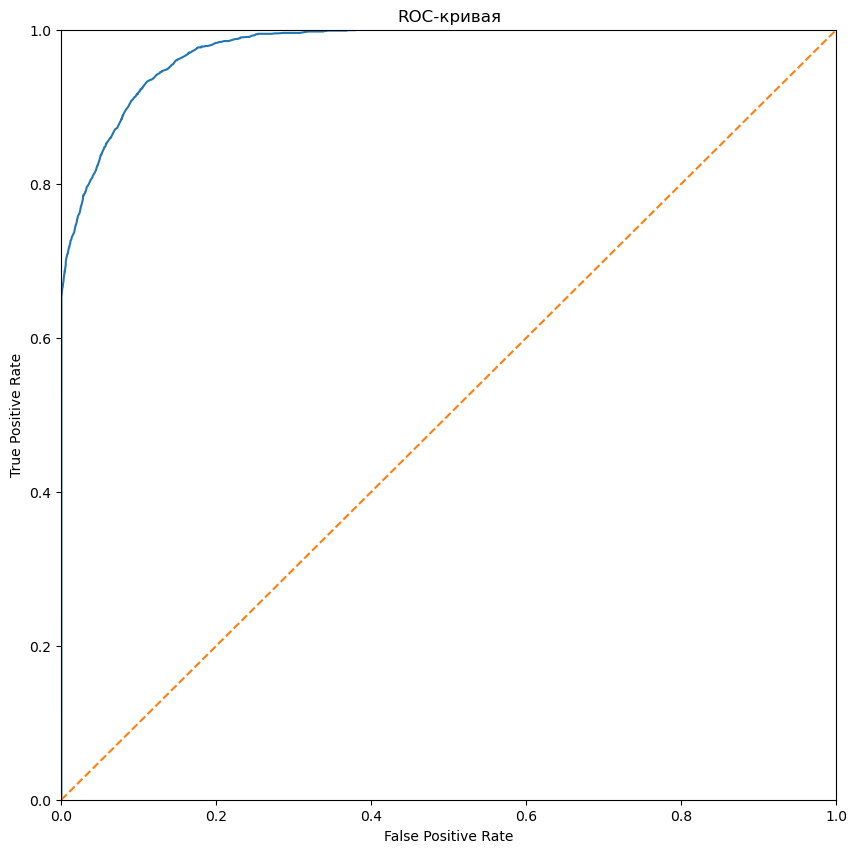

AUC: 0.9768857791967636


In [83]:
test_roc(model_ada_boost, X_valid, y_valid)

Получили очень хороший результат. Модель лучше случайной и так же лучше остальных моделей классификации.

## Тестирование моделей и проверка адекватности модели

In [112]:
#для удобства вывода в дальнейшем - соберем показатели в списки и создадим функцию их вывода

name_model = []
prec_score = []
acc_score = []

def get_scores(model, X_test, y_test):
    predictions_test = model.predict(X_test)
    test_f1 = f1_score(y_test, predictions_test)
    test_acc = accuracy_score(y_test, predictions_test)

    print("Accuracy")
    print("Тестовая выборка:", test_acc)
    print("F1-мера")
    print("Тестовая выборка:", test_f1)

    acc_score.append(round(test_acc, 2))
    prec_score.append(round(test_f1, 2))
    name_model.append(str(model).split('(')[0])

### Логистическая регрессия

In [113]:
get_scores(model_logreg, X_test, y_test)

Accuracy
Тестовая выборка: 0.9513159263497347
F1-мера
Тестовая выборка: 0.7229129662522202


### Случайные леса

In [114]:
get_scores(model_rand_forst, X_test, y_test)

Accuracy
Тестовая выборка: 0.9567252678664309
F1-мера
Тестовая выборка: 0.7514934289127836


### AdaBoost

In [115]:
get_scores(model_ada_boost, X_test, y_test)

Accuracy
Тестовая выборка: 0.9669718090086341
F1-мера
Тестовая выборка: 0.798732171156894


### Вывод

Для удобства выведем таблицу наших параметров по моделям:

In [120]:
models_table = (pd.DataFrame({'Model':name_model, 'Accuracy':acc_score, 
                                'F1 score':prec_score}).sort_values(by='F1 score', ascending=False).
                  reset_index(drop=True))

models_table

,Model,Accuracy,F1 score
0,AdaBoostClassifier,0.97,0.80
1,RandomForestClassifier,0.96,0.75
2,LogisticRegression,0.95,0.72


Наилучший результат получил AdaBoostClassifier `F1 score` - 0.80, второе место занимает RandomForestClassifier c `F1 score` - 0.75 и третье место - LogisticRegression с `F1 score` - 0.72


## Проверка адекватности моделей

Сравним наши модели с константной моделью: любому объекту она прогнозирует класс «0»

In [123]:
target_const = y*0
acc_const = accuracy_score(y, target_const)


print("Accuracy")
print("Константа:", acc_const)

Accuracy
Константа: 0.9117634820239681


Все три модели прошли проверку на адекватность. Правильность наших моделей выше, чем у случайной. Также мы смотрели ROC-AUC на валидации, наши модели показывали результаты лучше чем константа.

## Вывод
Нам были предоставлены исторические данные о признаках диабета. На основе этих данных мы сформировали признаки для обучения модели с целью прогнозирования наличия диабета у наблюдаемого пациента. Лучших результатов мы достигли с моделью на основе ансаблевого алгоритма AdaBoost - F1 мера - 0.80.


Для прогнозирования наличия диабета, можно использовать модель на основе алгоритма AdaBoost.